<a href="https://colab.research.google.com/github/slayergod/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

In [0]:
import pandas as pd

In [0]:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa_df = pd.read_csv(source_url)

In [5]:
iowa_df.head(3)

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500

[3 rows x 81 columns]

In [6]:
iowa_df.shape

(1460, 81)

In [7]:
iowa_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [10]:
pd.set_option('display.max_rows', 100)
iowa_df.dtypes[:7]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

In [11]:
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(4)

BedroomAbvGr  Fireplaces
515             3           1
259             2           0
469             3           0
369             3           1

In [12]:
iowa_df['LotFrontage'].head(2)

0    65.0
1    80.0
Name: LotFrontage, dtype: float64

In [13]:
iowa_df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
import numpy as np

In [15]:
type(np.nan)

float

In [16]:
iowa_df['LotFrontage'].isnull().sum()

259

In [0]:
iowa_df['LotFrontage'].dropna(inplace=True)

In [18]:
iowa_df['LotFrontage'].isnull().sum()

0

In [19]:
small_df = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.sample(3)

TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice
1429         1440      1440         0     182900
55           1425      1425         0     180500
425           651       707       682     135000

In [20]:
small_df['TotalSF'] = small_df['TotalBsmtSF'] + small_df['1stFlrSF'] + small_df['2ndFlrSF']
small_df.head(3)

TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice  TotalSF
0          856       856       854     208500     2566
1         1262      1262         0     181500     2524
2          920       920       866     223500     2706

In [21]:
small_df['PricePerSF'] = small_df['SalePrice'] / small_df['TotalSF']
small_df.head(3)

TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice  TotalSF  PricePerSF
0          856       856       854     208500     2566   81.254871
1         1262      1262         0     181500     2524   71.909667
2          920       920       866     223500     2706   82.594235

In [22]:
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
iowa_df[['LotShape', 'Alley', 'Street', 'SaleCondition']].head()

LotShape Alley Street SaleCondition
0      Reg   NaN   Pave        Normal
1      Reg   NaN   Pave        Normal
2      IR1   NaN   Pave        Normal
3      IR1   NaN   Pave       Abnorml
4      IR1   NaN   Pave        Normal

In [24]:
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [25]:
iowa_df['NormalCondition'] = np.where(iowa_df['SaleCondition']=='Normal', 'Yes', 'No')
iowa_df['NormalCondition'].value_counts()

Yes    1198
No      262
Name: NormalCondition, dtype: int64

In [26]:
iowa_df['LotShape'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object>

In [0]:
iowa_df['LotShape3']=iowa_df['LotShape'].map({'Reg':'Regular', 
                                              'IR1':'Irregular', 
                                              'IR2':'Other',
                                              'IR3':'Other'})

In [28]:
iowa_df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [29]:
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [30]:
iowa_df['Neighborhood'].value_counts().head(6)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Name: Neighborhood, dtype: int64

In [31]:
iowa_df['top_neighbors']='All others'
iowa_df.loc[iowa_df['Neighborhood']=='NAmes', 'top_neighbors']='north ames neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='CollgCr', 'top_neighbors']='creek neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='Gilbert', 'top_neighbors']='gilbert neighbors'
iowa_df['top_neighbors'].value_counts()

All others              1006
north ames neighbors     225
creek neighbors          150
gilbert neighbors         79
Name: top_neighbors, dtype: int64

In [32]:
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])

LotShape3             Irregular  Other  Regular
top_neighbors                                  
All others                  312     27      667
creek neighbors              53     11       86
gilbert neighbors            53     11       15
north ames neighbors         66      2      157

In [33]:
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], margins=True)

LotShape3             Irregular  Other  Regular   All
top_neighbors                                        
All others                  312     27      667  1006
creek neighbors              53     11       86   150
gilbert neighbors            53     11       15    79
north ames neighbors         66      2      157   225
All                         484     51      925  1460

In [34]:
pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'], normalize='index', margins=True)

LotShape3             Irregular     Other   Regular
top_neighbors                                      
All others             0.310139  0.026839  0.663022
creek neighbors        0.353333  0.073333  0.573333
gilbert neighbors      0.670886  0.139241  0.189873
north ames neighbors   0.293333  0.008889  0.697778
All                    0.331507  0.034932  0.633562

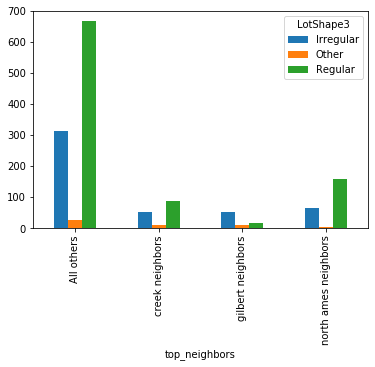

In [35]:
myresults = pd.crosstab(iowa_df['top_neighbors'], iowa_df['LotShape3'])
myresults.plot(kind='bar');

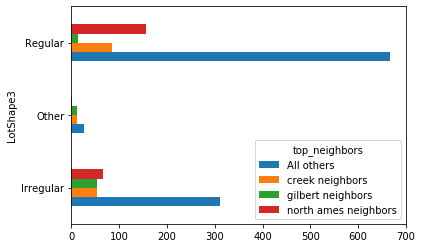

In [36]:
myresults = pd.crosstab(iowa_df['LotShape3'], iowa_df['top_neighbors'])
myresults.plot(kind='barh');

### Load a new dataset

In [37]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-13 16:49:01--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                 <=>]  21.71M   921KB/s    in 25s     

2020-03-13 16:49:26 (904 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



In [38]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [39]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv')
loans_df.head(7)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status        pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid         n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100   

In [40]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
loans_df.tail(7)

id  member_id  ...  settlement_percentage  settlement_term
128277 NaN        NaN  ...                    NaN              NaN
128278 NaN        NaN  ...                    NaN              NaN
128279 NaN        NaN  ...                    NaN              NaN
128280 NaN        NaN  ...                    NaN              NaN
128281 NaN        NaN  ...                    NaN              NaN
128282 NaN        NaN  ...                    NaN              NaN
128283 NaN        NaN  ...                    NaN              NaN

[7 rows x 144 columns]

In [41]:
pd.set_option('display.max_rows', 100)
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [42]:
loans_df['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [43]:
loans_df['int_rate'][3]

' 14.47%'

In [44]:
type(loans_df['int_rate'][3])

str

In [0]:
int_rate = ' 14.47%'

In [46]:
int_rate.strip()

'14.47%'

In [47]:
int_rate.strip('%')

' 14.47'

In [48]:
int_rate.strip().strip('%')

'14.47'

In [49]:
float('14.47') 

14.47

In [50]:
float(int_rate.strip().strip('%')) 

14.47

In [51]:
type(float(int_rate.strip().strip('%')) )

float

In [0]:
def myfunc(cell_contents):
  return float(cell_contents.strip().strip('%'))

In [53]:
myfunc(int_rate)

14.47

In [54]:
type(myfunc(int_rate))

float

In [0]:
new_list = []

In [0]:
for cell in loans_df['int_rate']:
  new_list.append(myfunc(cell))

In [57]:
new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 10.33, 23.4, 10.72]

In [58]:
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [59]:
loans_df['int_rate_cleaned']= pd.Series(new_list)
loans_df[['int_rate', 'int_rate_cleaned']].head()

int_rate  int_rate_cleaned
0   16.14%             16.14
1   11.80%             11.80
2   11.31%             11.31
3   14.47%             14.47
4   27.27%             27.27

In [60]:
loans_df['int_rate_cleaned_X']= new_list
loans_df[['int_rate', 'int_rate_cleaned_X']].head()

int_rate  int_rate_cleaned_X
0   16.14%               16.14
1   11.80%               11.80
2   11.31%               11.31
3   14.47%               14.47
4   27.27%               27.27

In [61]:
loans_df[['int_rate', 'int_rate_cleaned_X']].dtypes

int_rate               object
int_rate_cleaned_X    float64
dtype: object

In [62]:
loans_df['int_rate_cleaned2'] = loans_df['int_rate'].apply(myfunc)
loans_df[['int_rate', 'int_rate_cleaned', 'int_rate_cleaned2']].head()

int_rate  int_rate_cleaned  int_rate_cleaned2
0   16.14%             16.14              16.14
1   11.80%             11.80              11.80
2   11.31%             11.31              11.31
3   14.47%             14.47              14.47
4   27.27%             27.27              27.27

In [63]:
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [64]:
loans_df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [65]:
len(loans_df['emp_title'].unique())

43852

In [66]:
loans_df['emp_title'].nunique()

43851

In [67]:
loans_df['emp_title'].isnull().sum()

20922

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [69]:
print(type('Supervisor'))
isinstance('Supervisor', str)

<class 'str'>


True

In [70]:
' superVIsor'.title().strip()

'Supervisor'

In [0]:
def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "unknown"

In [72]:
clean_title(' superVIsor')

'Supervisor'

In [73]:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [74]:
[clean_title(jobtitle) for jobtitle in   examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
loans_df['emp_title_cleaned'] = loans_df['emp_title'].apply(clean_title)

In [76]:
loans_df[['emp_title', 'emp_title_cleaned']].sample(10)

emp_title         emp_title_cleaned
100366         Sr Vice President          Sr Vice President
59556               UX Consultant             Ux Consultant
34936                         NaN                   unknown
49877            property manager          Property Manager
45075   Administrative assistant   Administrative Assistant
106292                Claims Tech               Claims Tech
103702                 Bus Driver                Bus Driver
3801           Money room cashier        Money Room Cashier
8605                          NaN                   unknown
73415         Assistant Professor       Assistant Professor

In [77]:
loans_df['emp_title_cleaned'].value_counts().head(8)

unknown             20922
Teacher              2553
Manager              2393
Registered Nurse     1416
Driver               1258
Supervisor           1160
Truck Driver          920
Rn                    832
Name: emp_title_cleaned, dtype: int64

In [78]:
loans_df['emp_title_cleaned'].nunique()

34877

In [79]:
loans_df['new_emp_title']='All others'
loans_df.loc[loans_df['emp_title']=='Manager','new_emp_title' ]='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher','new_emp_title' ]='Teacher'
loans_df['new_emp_title'].value_counts()

All others    124425
Teacher         2088
Manager         1771
Name: new_emp_title, dtype: int64

In [80]:
loans_df['emp_title_cleaned'].isnull().sum()

0

In [81]:
loans_df.columns[:30]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record'],
      dtype='object')

In [82]:
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [83]:
mylist = []
for col in loans_df.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]

In [85]:
loans_df['issue_d'].dtype

dtype('O')

In [86]:
print(loans_df['issue_d'][0])
type(loans_df['issue_d'][0])

Dec-2018


str

In [87]:
loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'], infer_datetime_format=True)

loans_df[['issue_d','new_issue_d']]

issue_d new_issue_d
0       Dec-2018  2018-12-01
1       Dec-2018  2018-12-01
2       Dec-2018  2018-12-01
3       Dec-2018  2018-12-01
4       Dec-2018  2018-12-01
...          ...         ...
128279  Oct-2018  2018-10-01
128280  Oct-2018  2018-10-01
128281  Oct-2018  2018-10-01
128282  Oct-2018  2018-10-01
128283  Oct-2018  2018-10-01

[128284 rows x 2 columns]

In [88]:
type(loans_df['new_issue_d'][0])

print(loans_df['new_issue_d'].dtype)

datetime64[ns]


In [89]:
loans_df['new_issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [90]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [91]:
loans_df['year'] = loans_df['new_issue_d'].dt.year
loans_df[['issue_d', 'new_issue_d', 'year']].sample(7)

issue_d new_issue_d  year
82739   Oct-2018  2018-10-01  2018
83768   Oct-2018  2018-10-01  2018
29889   Dec-2018  2018-12-01  2018
42170   Nov-2018  2018-11-01  2018
61703   Nov-2018  2018-11-01  2018
109379  Oct-2018  2018-10-01  2018
62041   Nov-2018  2018-11-01  2018

In [92]:
loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df[['issue_d', 'new_issue_d', 'year', 'month']].sample(7)

issue_d new_issue_d  year  month
90753   Oct-2018  2018-10-01  2018     10
77172   Nov-2018  2018-11-01  2018     11
21644   Dec-2018  2018-12-01  2018     12
128164  Oct-2018  2018-10-01  2018     10
123379  Oct-2018  2018-10-01  2018     10
109243  Oct-2018  2018-10-01  2018     10
50597   Nov-2018  2018-11-01  2018     11

In [93]:
loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
loans_df[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(7)

issue_d new_issue_d  year  month  weekday
125815  Oct-2018  2018-10-01  2018     10        0
122286  Oct-2018  2018-10-01  2018     10        0
94653   Oct-2018  2018-10-01  2018     10        0
43109   Nov-2018  2018-11-01  2018     11        3
47906   Nov-2018  2018-11-01  2018     11        3
20351   Dec-2018  2018-12-01  2018     12        5
47946   Nov-2018  2018-11-01  2018     11        3

In [94]:
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d','new_last_credit_pull_d']].head() 

last_credit_pull_d new_last_credit_pull_d
0           Dec-2019             2019-12-01
1           Jan-2020             2020-01-01
2           Feb-2020             2020-02-01
3           Jan-2020             2020-01-01
4           Jan-2020             2020-01-01

In [0]:
loans_df['day_diff'] =  loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']

In [96]:
loans_df[['issue_d', 'last_credit_pull_d', 'day_diff']]

issue_d last_credit_pull_d  day_diff
0       Dec-2018           Dec-2019 -365 days
1       Dec-2018           Jan-2020 -396 days
2       Dec-2018           Feb-2020 -427 days
3       Dec-2018           Jan-2020 -396 days
4       Dec-2018           Jan-2020 -396 days
...          ...                ...       ...
128279  Oct-2018           Nov-2018  -31 days
128280  Oct-2018           Jan-2020 -457 days
128281  Oct-2018           Jan-2020 -457 days
128282  Oct-2018           Jan-2020 -457 days
128283  Oct-2018           Jan-2020 -457 days

[128284 rows x 3 columns]

In [97]:
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [98]:
loans_df['day_diff'].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

In [101]:
loans_df[['term']].head()

term
0   60 months
1   36 months
2   36 months
3   60 months
4   60 months

In [0]:
term = '60 months'

In [104]:
term.strip(' months')

'60'

In [109]:
int(term.strip(' months'))

60

In [107]:
type(int(term.strip(' months')))

int

In [0]:
def intfunc(cell_contents):
  return int(cell_contents.strip(' months'))

In [111]:
intfunc(term)

60

In [112]:
type(intfunc(term))

int

In [0]:
term_list = []

In [0]:
for cell in loans_df['term']:
  term_list.append(intfunc(cell))

In [116]:
term_list[:10]

[60, 36, 36, 60, 60, 36, 60, 36, 36, 36]

In [117]:
loans_df['term'] = term_list
loans_df[['term']].head()

term
0    60
1    36
2    36
3    60
4    60

In [118]:
loans_df['term'].dtypes

dtype('int64')

In [122]:
loans_df['loan_status_is_great'] = loans_df['loan_status']
loans_df['loan_status_is_great']= int(0)
loans_df.loc[loans_df['loan_status']== 'Current', 'loan_status_is_great']= int(1)
loans_df.loc[loans_df['loan_status']== 'Fully Paid', 'loan_status_is_great']= int(1)
loans_df['loan_status_is_great'].value_counts()

1    117306
0     10978
Name: loan_status_is_great, dtype: int64

In [125]:
loans_df['last_pymnt_d'].head()

0    May-2019
1    Feb-2020
2    Feb-2019
3    Oct-2019
4    Feb-2020
Name: last_pymnt_d, dtype: object

In [138]:
loans_df['last_pymnt_d_new'] = pd.to_datetime(loans_df['last_pymnt_d'], infer_datetime_format=True)
loans_df['last_pymnt_d_month'] = loans_df['last_pymnt_d_new'].dt.month.astype('Int64')
loans_df['last_pymnt_d_year'] = loans_df['last_pymnt_d_new'].dt.year.astype('Int64')
loans_df[['last_pymnt_d_month', 'last_pymnt_d_year']].head()

last_pymnt_d_month  last_pymnt_d_year
0                   5               2019
1                   2               2020
2                   2               2019
3                  10               2019
4                   2               2020

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01